# Lineare Regression für das Wirtschaftpoltische Seminar 


- Ziel ein Lineare Regression  erstellen vom Europäische Euro Raum

## Daten für die Hausarbeit
- Euro Raum

Regression Model OLS
Model:

    - BIP = Oil_price + (m1,m2,m3) + CPI + evtl Arbeitslosigkeit

In [2]:
import pandas as pd
import datetime as dt
import seaborn as sns
import requests
import json
import statsmodels.api as sm
import numpy as np

### BIP der Euro Raum erhalten von der Offizielen Seite 
- https://data.ecb.europa.eu/data/datasets/MNA/MNA.A.N.I9.W2.S1.S1.B.B1GQ._Z._Z._Z.PE_R_POP.V._Z 

In [5]:
BIPEUArea = pd.read_csv('/Users/riccardo/Desktop/Repositorys_Github/Training/Scripts/models/Linear Regression/Data_EU/ECB Data Merged Euro_Area.csv')
BIPEUArea.head()

,Date,BIP,M1,M2,M3,CPI,Unemployment_Rate,Oil_Price
0,1995,17927.30,15583338,38672574,45154926,30.632925,127.8,206.384976
1,1996,18652.69,16610770,40712371,47550294,28.160923,129.5,249.702360
2,1997,19069.85,18055274,42509756,49518397,20.464823,129.0,231.723884
3,1998,19814.33,19770648,44785894,52075662,14.694074,125.3,157.514630
4,1999,20671.06,22304359,47952809,54531037,14.068043,117.5,217.298631


In [6]:
BIPEUArea = BIPEUArea.drop(columns=['DATE'])
BIPEUArea = BIPEUArea.rename(columns={'TIME PERIOD': 'Date', 'Gross domestic product at market prices (MNA.A.N.I9.W2.S1.S1.B.B1GQ._Z._Z._Z.PE_R_POP.V._Z)': 'BIP'})

KeyError: "['DATE'] not found in axis"

In [7]:
BIPEUArea.head()

,Date,BIP,M1,M2,M3,CPI,Unemployment_Rate,Oil_Price
0,1995,17927.30,15583338,38672574,45154926,30.632925,127.8,206.384976
1,1996,18652.69,16610770,40712371,47550294,28.160923,129.5,249.702360
2,1997,19069.85,18055274,42509756,49518397,20.464823,129.0,231.723884
3,1998,19814.33,19770648,44785894,52075662,14.694074,125.3,157.514630
4,1999,20671.06,22304359,47952809,54531037,14.068043,117.5,217.298631


## M1, M2, M3 Datasets

In [1]:
df_m1 = pd.read_csv('/Users/riccardo/Desktop/Repositorys_Github/Training/Scripts/models/Linear Regression/Data_EU/ECB Data M1 Euro_Area.csv')
df_m2 = pd.read_csv('/Users/riccardo/Desktop/Repositorys_Github/Training/Scripts/models/Linear Regression/Data_EU/ECB Data M2 Euro_Area.csv')
df_m3 = pd.read_csv('/Users/riccardo/Desktop/Repositorys_Github/Training/Scripts/models/Linear Regression/Data_EU/ECB Data M3 Euro_Area.csv')
# in Euro

NameError: name 'pd' is not defined

In [6]:
df_m1.rename(columns={'Monetary aggregate M1 reported by MFIs, central gov. and post office giro institutions in the euro area (stocks) (BSI.M.U2.Y.V.M10.X.1.U2.2300.Z01.E)': 'M1',
                      'DATE': 'Date'}, inplace=True)
df_m2.rename(columns={'Monetary aggregate M2 reported by MFIs, central gov. and post office giro institutions in the euro area (stocks) (BSI.M.U2.Y.V.M20.X.1.U2.2300.Z01.E)': 'M2',
                      'DATE': 'Date'}, inplace=True)
df_m3.rename(columns={'Monetary aggregate M3 reported by MFIs, central gov. and post office giro institutions in the euro area (stocks) (BSI.M.U2.Y.V.M30.X.1.U2.2300.Z01.E)': 'M3',
                      'DATE': 'Date'}, inplace=True)

df_m1.drop(columns=['TIME PERIOD'], inplace=True)
df_m2.drop(columns=['TIME PERIOD'], inplace=True)
df_m3.drop(columns=['TIME PERIOD'], inplace=True)

In [7]:
#Change dateformat from YYYY-MM-DD to YYYY-MM (e.g. 2020-01-01 to 2020-01)
df_m1['Date'] = pd.to_datetime(df_m1['Date'])
df_m1['Date'] = df_m1['Date'].dt.to_period('M')

df_m2['Date'] = pd.to_datetime(df_m2['Date'])
df_m2['Date'] = df_m2['Date'].dt.to_period('M')

df_m3['Date'] = pd.to_datetime(df_m3['Date'])
df_m3['Date'] = df_m3['Date'].dt.to_period('M')

In [8]:
df_m3.head(), df_m2.head(), df_m1.head()

(      Date       M3
 0  1980-01  1097404
 1  1980-02  1105520
 2  1980-03  1117228
 3  1980-04  1122639
 4  1980-05  1130672,
       Date       M2
 0  1980-01  1070496
 1  1980-02  1078232
 2  1980-03  1088333
 3  1980-04  1093263
 4  1980-05  1100958,
       Date      M1
 0  1980-01  444330
 1  1980-02  447116
 2  1980-03  451370
 3  1980-04  453226
 4  1980-05  455917)

### Da wir Monatlich Daten haben und wir nun die Jährliche Daten haben möchten, müssen wir die Daten gruppieren.

In [9]:
# Assuming your CSV files have a 'Date' or 'Year-Month' column for timestamps
def convert_to_yearly(df):
  """Converts a pandas DataFrame with monthly data to a DataFrame with yearly data.

  Args:
      df (pd.DataFrame): The DataFrame containing monthly data.

  Returns:
      pd.DataFrame: A new DataFrame with yearly data.
  """

  # Convert 'Date' column to datetime if necessary
  if pd.api.types.is_period_dtype(df['Date']):
    df['Date'] = df['Date'].dt.to_timestamp()
  df['Year'] = pd.to_datetime(df['Date']).dt.year  # Assuming 'Date' column exists

  # Group by year and calculate the desired aggregation (e.g., sum, mean)
  if 'M1' in df.columns: 
    yearly_data = df.groupby('Year').agg(Sum=('M1', 'sum'))  # Replace 'column_to_sum' with your column
  elif 'M2' in df.columns: 
    yearly_data = df.groupby('Year').agg(Sum=('M2', 'sum'))
  elif 'M3' in df.columns: 
    yearly_data = df.groupby('Year').agg(Sum=('M3', 'sum'))

  return yearly_data

# Read the CSV files (replace paths if necessary)
df_m1_yearly = convert_to_yearly(df_m1.copy())
df_m2_yearly = convert_to_yearly(df_m2.copy())  
df_m3_yearly = convert_to_yearly(df_m3.copy())  

/var/folders/13/3pzxxwtd6cbdvdzq_lc6112r0000gn/T/ipykernel_30894/4257450793.py:13: DeprecationWarning: is_period_dtype is deprecated and will be removed in a future version. Use `isinstance(dtype, pd.PeriodDtype)` instead
  if pd.api.types.is_period_dtype(df['Date']):
/var/folders/13/3pzxxwtd6cbdvdzq_lc6112r0000gn/T/ipykernel_30894/4257450793.py:13: DeprecationWarning: is_period_dtype is deprecated and will be removed in a future version. Use `isinstance(dtype, pd.PeriodDtype)` instead
  if pd.api.types.is_period_dtype(df['Date']):
/var/folders/13/3pzxxwtd6cbdvdzq_lc6112r0000gn/T/ipykernel_30894/4257450793.py:13: DeprecationWarning: is_period_dtype is deprecated and will be removed in a future version. Use `isinstance(dtype, pd.PeriodDtype)` instead
  if pd.api.types.is_period_dtype(df['Date']):


In [10]:
# Print or use the yearly DataFrames as needed
df_m1_yearly.reset_index(inplace=True)
df_m2_yearly.reset_index(inplace=True)
df_m3_yearly.reset_index(inplace=True)
df_m1_yearly.rename(columns={'Sum': 'M1', "Year": "Date"}, inplace=True)
df_m2_yearly.rename(columns={'Sum': 'M2', "Year": "Date"}, inplace=True)
df_m3_yearly.rename(columns={'Sum': 'M3', "Year": "Date"}, inplace=True)

In [8]:
BIPEUArea['Date'].min(), BIPEUArea['Date'].max(),

(1995, 2022)

### Filtern der Daten damit wir die gleichen Zeitraum haben.

In [9]:
df_m1_yearly_filtered = df_m1_yearly.query('Date >= 1995 & Date <= 2022')
df_m2_yearly_filtered = df_m2_yearly.query('Date >= 1995 & Date <= 2022')
df_m3_yearly_filtered = df_m3_yearly.query('Date >= 1995 & Date <= 2022')

print(df_m1_yearly_filtered.shape, df_m2_yearly_filtered.shape, df_m3_yearly_filtered.shape, BIPEUArea.shape)
print('M1', df_m1_yearly_filtered['Date'].min(), df_m1_yearly_filtered['Date'].max())
print('M2',df_m2_yearly_filtered['Date'].min(), df_m2_yearly_filtered['Date'].max())
print('M3', df_m3_yearly_filtered['Date'].min(), df_m3_yearly_filtered['Date'].max())
print('BIPEUArea', BIPEUArea['Date'].min(), BIPEUArea['Date'].max())

NameError: name 'df_m1_yearly' is not defined

# M1, M2, M3, BIPEUArea wurden richtig fomratiert und gefiltert
- weiter geht es mit Oil Prices

## Oil Price Datasets
Herunterladen druch die FED Api

In [13]:
api_key = 'd9ce385a3f807aaba9590769b5f994a1'
OIL_dataURL = f'https://api.stlouisfed.org/fred/series/observations?series_id=POILBREUSDM&api_key={api_key}&file_type=json&frequency=m'
CPI_dataURL = f'https://api.stlouisfed.org/fred/series/observations?series_id=CPHPTT01EZM659N&api_key={api_key}&file_type=json&frequency=m'
un_dataURL = f'https://api.stlouisfed.org/fred/series/observations?series_id=LRHUTTTTEZM156S&api_key={api_key}&file_type=json&frequency=m'


In [14]:
# Setzen Sie Ihren API-Schlüssel hier ein
api_key = 'd9ce385a3f807aaba9590769b5f994a1'
def get_data(url):
    response = requests.get(url)
    if response.status_code == 200:
        data = response.json()
        observations = []
        for observation in data['observations']:
            date = observation['date']
            value = observation['value']
            if value != '.':
                value = float(value)
                observations.append({'Date': date, 'Value': value})
        df = pd.DataFrame(observations)
        return df
    else:
        print(f'Error: {response.status_code}')
        return None

Oil_price = get_data(OIL_dataURL)
CPI = get_data(CPI_dataURL)
unemployment = get_data(un_dataURL)
unemployment.shape, CPI.shape, Oil_price.shape

((391, 2), (385, 2), (410, 2))

In [15]:
Oil_price.columns, CPI.columns, unemployment.columns

(Index(['Date', 'Value'], dtype='object'),
 Index(['Date', 'Value'], dtype='object'),
 Index(['Date', 'Value'], dtype='object'))

In [16]:
def convert_to_yearly_(df):
  """Converts a pandas DataFrame with monthly data to a DataFrame with yearly data.

  Args:
      df (pd.DataFrame): The DataFrame containing monthly data.

  Returns:
      pd.DataFrame: A new DataFrame with yearly data.
  """

  # Convert 'Date' column to datetime if necessary
  if pd.api.types.is_period_dtype(df['Date']):
    df['Date'] = df['Date'].dt.to_timestamp()
  df['Date'] = pd.to_datetime(df['Date']).dt.year  # Assuming 'Date' column exists

  # Group by year and calculate the desired aggregation (e.g., sum, mean)
  if 'Date' in df.columns: 
    yearly_data = df.groupby('Date').agg(Sum=('Value', 'sum'))  # Replace 'column_to_sum' with your column
    yearly_data.reset_index(inplace=True)
  return yearly_data

Oil_price = convert_to_yearly_(Oil_price)
Oil_price.head()

/var/folders/13/3pzxxwtd6cbdvdzq_lc6112r0000gn/T/ipykernel_30894/1872458097.py:12: DeprecationWarning: is_period_dtype is deprecated and will be removed in a future version. Use `isinstance(dtype, pd.PeriodDtype)` instead
  if pd.api.types.is_period_dtype(df['Date']):


,Date,Sum
0,1990,284.479368
1,1991,240.904445
2,1992,232.298854
3,1993,205.017111
4,1994,191.515897


In [17]:
Oil_price.rename(columns={'Sum': 'Oil_Price'}, inplace=True)
Oil_price_yearly_filtered = Oil_price.query('Date >= 1995 & Date <= 2022')


In [18]:
Oil_price_yearly_filtered.head()


,Date,Oil_Price
5,1995,206.384976
6,1996,249.702360
7,1997,231.723884
8,1998,157.514630
9,1999,217.298631


# Oil Price ende 

# Unemployment rate 

In [19]:
unemployment_rate_EUArea = get_data(un_dataURL)
unemployment_rate_EUArea = convert_to_yearly_(unemployment_rate_EUArea)
unemployment_rate_EUArea.rename(columns={'Sum': 'Unemployment_Rate'}, inplace=True)
unemployment_rate_EUArea_yearly_filtered = unemployment_rate_EUArea.query('Date >= 1995 & Date <= 2022')


/var/folders/13/3pzxxwtd6cbdvdzq_lc6112r0000gn/T/ipykernel_30894/1872458097.py:12: DeprecationWarning: is_period_dtype is deprecated and will be removed in a future version. Use `isinstance(dtype, pd.PeriodDtype)` instead
  if pd.api.types.is_period_dtype(df['Date']):


## CPI des Euro Raums

In [20]:
CPI_EUArea = get_data(CPI_dataURL)
CPI_EUArea = convert_to_yearly_(CPI_EUArea)
CPI_EUArea.rename(columns={'Sum': 'CPI'}, inplace=True)
CPI_EUArea_yearly_filtered = CPI_EUArea.query('Date >= 1995 & Date <= 2022')
CPI_EUArea_yearly_filtered.head()

/var/folders/13/3pzxxwtd6cbdvdzq_lc6112r0000gn/T/ipykernel_30894/1872458097.py:12: DeprecationWarning: is_period_dtype is deprecated and will be removed in a future version. Use `isinstance(dtype, pd.PeriodDtype)` instead
  if pd.api.types.is_period_dtype(df['Date']):


,Date,CPI
4,1995,30.632925
5,1996,28.160923
6,1997,20.464823
7,1998,14.694074
8,1999,14.068043


In [21]:
CPI_EUArea_yearly_filtered.shape, unemployment_rate_EUArea_yearly_filtered.shape, Oil_price_yearly_filtered.shape

((28, 2), (28, 2), (28, 2))

In [22]:
print(CPI_EUArea_yearly_filtered['Date'].min(), CPI_EUArea_yearly_filtered['Date'].max())
print(unemployment_rate_EUArea_yearly_filtered['Date'].min(), unemployment_rate_EUArea_yearly_filtered['Date'].max())
print(Oil_price_yearly_filtered['Date'].min(), Oil_price_yearly_filtered['Date'].max())
print(df_m1_yearly_filtered['Date'].min(), df_m1_yearly_filtered['Date'].max())
print(df_m2_yearly_filtered['Date'].min(), df_m2_yearly_filtered['Date'].max())
print(df_m3_yearly_filtered['Date'].min(), df_m3_yearly_filtered['Date'].max())

df_m1_yearly_filtered.shape, df_m2_yearly_filtered.shape, df_m3_yearly_filtered.shape, BIPEUArea.shape, CPI_EUArea_yearly_filtered.shape, unemployment_rate_EUArea_yearly_filtered.shape, Oil_price_yearly_filtered.shape


1995 2022
1995 2022
1995 2022
1995 2022
1995 2022
1995 2022


((28, 2), (28, 2), (28, 2), (28, 2), (28, 2), (28, 2), (28, 2))

In [23]:
#zusammenführen der variablen in einem Datensatz
df_merged = pd.merge(BIPEUArea, df_m1_yearly_filtered, on='Date', how='inner')
df_merged = pd.merge(df_merged, df_m2_yearly_filtered, on='Date', how='inner')
df_merged = pd.merge(df_merged, df_m3_yearly_filtered, on='Date', how='inner')
df_merged = pd.merge(df_merged, CPI_EUArea_yearly_filtered, on='Date', how='inner')
df_merged = pd.merge(df_merged, unemployment_rate_EUArea_yearly_filtered, on='Date', how='inner')
df_merged = pd.merge(df_merged, Oil_price_yearly_filtered, on='Date', how='inner')
df_merged.to_csv('/Users/riccardo/Desktop/Repositorys_Github/Training/Scripts/models/Linear Regression/Data_EU/ECB Data Merged Euro_Area.csv', index=False)

In [24]:
df_merged.columns

Index(['Date', 'BIP', 'M1', 'M2', 'M3', 'CPI', 'Unemployment_Rate',
       'Oil_Price'],
      dtype='object')

In [25]:
df_merged.corr()

,Date,BIP,M1,M2,M3,CPI,Unemployment_Rate,Oil_Price
Date,1.000000,0.986540,0.959609,0.984767,0.984861,0.064597,-0.305018,0.654168
BIP,0.986540,1.000000,0.955107,0.978432,0.984349,0.184294,-0.414357,0.676258
M1,0.959609,0.955107,1.000000,0.989401,0.982060,0.194780,-0.416296,0.519770
M2,0.984767,0.978432,0.989401,1.000000,0.998012,0.159225,-0.360874,0.615695
M3,0.984861,0.984349,0.982060,0.998012,1.000000,0.168805,-0.380730,0.638855
CPI,0.064597,0.184294,0.194780,0.159225,0.168805,1.000000,-0.454339,0.259338
Unemployment_Rate,-0.305018,-0.414357,-0.416296,-0.360874,-0.380730,-0.454339,1.000000,0.018737
Oil_Price,0.654168,0.676258,0.519770,0.615695,0.638855,0.259338,0.018737,1.000000


## Data Collection

## Creating a Regression Model

# Model mit M1

In [12]:
Y = BIPEUArea['BIP']
X = BIPEUArea[['M1', 'CPI', 'Unemployment_Rate','Oil_Price']]
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()
results.params

const                24571.517958
M1                       0.000116
CPI                    -36.863913
Unemployment_Rate      -55.092532
Oil_Price                4.765847
dtype: float64

In [13]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    BIP   R-squared:                       0.974
Model:                            OLS   Adj. R-squared:                  0.969
Method:                 Least Squares   F-statistic:                     214.9
Date:                Thu, 18 Apr 2024   Prob (F-statistic):           7.41e-18
Time:                        16:27:32   Log-Likelihood:                -229.67
No. Observations:                  28   AIC:                             469.3
Df Residuals:                      23   BIC:                             476.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              2.457e+04   1911.017     12.858      0.000    2.06e+04    2.85e+04
M1                    0.0001   7.31e-06     15.878      0.000       0.000       0.000
CPI                 -36.8639     12.420     -2.968      0.007     -62.558     -11.170
Unemployment_Rate   -55.0925     14.837     -3.713      0.001     -85.785     -24.401
Oil_Price             4.7658      0.648      7.353      0.000       3.425       6.107
==============================================================================
Omnibus:                        0.067   Durbin-Watson:                   0.788
Prob(Omnibus):                  0.967   Jarque-Bera (JB):                0.042
Skew:                          -0.002   Prob(JB):                        0.979
Kurtosis:                       2.810   Cond. No.                     6.93e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.93e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [15]:
import pandas as pd

# Specify the delimiter and encoding when reading the CSV file
df = pd.read_csv("/Users/riccardo/Desktop/Repositorys_Github/Training/Scripts/models/Linear Regression/Data_EU/Mappe4.csv", encoding='latin1', sep=';',
                 decimal=',', thousands='.')


In [16]:
df

,Date,Unemployment Rate in %,"Inflation rate, average consumer prices (Annual percent change)","GDP per capita, current prices\n (U.S. dollars per capita)",M1,M2,M3,Reserve Money
0,2018,6.77,10.6,2531.48,8.756317e+07,1.051250e+08,1.059611e+08,3.209544e+07
1,2019,7.37,255.3,1746.52,2.048044e+08,2.242114e+08,2.248196e+08,5.896339e+07
2,2020,8.65,557.2,1769.56,1.254232e+09,1.315904e+09,1.325582e+09,1.632333e+08
3,2021,9.54,98.5,2324.77,3.587811e+09,3.855719e+09,3.882851e+09,2.953491e+08
4,2022,9.26,193.4,1978.32,1.355427e+10,1.524366e+10,1.535200e+10,6.294636e+08
5,2023,9.12,667.4,1993.04,1.201439e+11,1.292803e+11,1.293964e+11,1.142566e+10


Text(0, 0.5, 'M1, M2, M3')

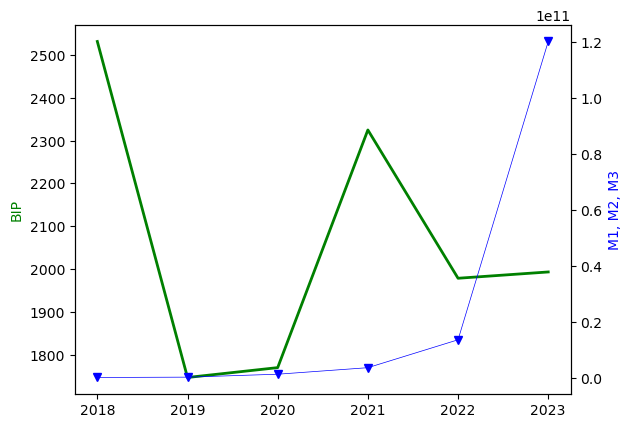

In [21]:
fig, ax1 = plt.subplots()
#unterschiedlicher marker für die verschiedenen Linien
ax2 = ax1.twinx()
ax1.plot(df['Date'], df['GDP per capita, current prices\n (U.S. dollars per capita)'], color='green', linewidth=2, label='BIP' ) 
ax2.plot(df['Date'], df['M1'], color='blue', linewidth=0.5, label='M1', marker = "v")   


ax1.set_ylabel('BIP', color='green')  
ax2.set_ylabel('M1, M2, M3', color='blue')    

In [27]:
Y = df['GDP per capita, current prices\n (U.S. dollars per capita)']
X = df[['M1', 'Inflation rate, average consumer prices (Annual percent change)', 'Unemployment Rate in %']]
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()
results.summary()

/Users/riccardo/anaconda3/envs/model/lib/python3.9/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                                OLS Regression Results                                               
=====================================================================================================================
Dep. Variable:     GDP per capita, current prices
 (U.S. dollars per capita)   R-squared:                       0.650
Model:                                                                   OLS   Adj. R-squared:                  0.125
Method:                                                        Least Squares   F-statistic:                     1.239
Date:                                                       Wed, 17 Apr 2024   Prob (F-statistic):              0.476
Time:                                                               13:02:51   Log-Likelihood:                -39.271
No. Observations:                                                          6   AIC:                             86.54
Df Residuals:                                                              2   BIC:                             85.71
Df Model:                                                                  3                                         
Covariance Type:                                                   nonrobust                                         
===================================================================================================================================
                                                                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------
const                                                            2412.1059   1033.448      2.334      0.145   -2034.461    6858.672
M1                                                               4.227e-09    3.8e-09      1.113      0.382   -1.21e-08    2.06e-08
Inflation rate, average consumer prices (Annual percent change)    -1.3069      0.699     -1.870      0.202      -4.314       1.700
Unemployment Rate in %                                             -7.6185    125.871     -0.061      0.957    -549.199     533.962
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   2.929
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.695
Skew:                          -0.542   Prob(JB):                        0.707
Kurtosis:                       1.734   Cond. No.                     4.32e+11
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.32e+11. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [42]:
import pandas as pd
import datetime as dt
import seaborn as sns
import requests
import json
import statsmodels.api as sm
import numpy as np

In [35]:
import pandas as pd

# Daten einlesen
raw = pd.read_csv('/Users/riccardo/Desktop/Repositorys_Github/Training/Scripts/models/Linear Regression/Data_EU/Raw_data.csv', encoding='latin1', sep=';')

# Datentypen formatieren
raw['Jahr'] = raw['Jahr'].astype(int)
raw['Jaehrlich M1 (Z$M)'] = raw['Jaehrlich M1 (Z$M)'].str.replace(',', '').astype(float)
raw['Jaehrlich M2 (Z$M)'] = raw['Jaehrlich M2 (Z$M)'].str.replace(',', '').astype(float)
raw['Jaehrlich M3 (Z$M)'] = raw['Jaehrlich M3 (Z$M)'].str.replace(',', '').astype(float)
raw["GDP per capita, current prices\r\n (U.S. dollars per capita)"] = raw["GDP per capita, current prices\r\n (U.S. dollars per capita)"].str.replace(',', '').astype(float)
raw['Inflation rate, average consumer prices (Annual percent change)'] = raw['Inflation rate, average consumer prices (Annual percent change)'].str.replace('%', '').str.replace(',', '.').astype(float)
raw['Unemployment rate'] = raw['Unemployment rate'].str.replace('%', '').str.replace(',', '.').astype(float)

# Informationen über die Daten anzeigen
raw.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 7 columns):
 #   Column                                                           Non-Null Count  Dtype  
---  ------                                                           --------------  -----  
 0   Jahr                                                             17 non-null     int64  
 1   Jaehrlich M1 (Z$M)                                               17 non-null     float64
 2   Jaehrlich M2 (Z$M)                                               17 non-null     float64
 3   Jaehrlich M3 (Z$M)                                               17 non-null     float64
 4   GDP per capita, current prices
 (U.S. dollars per capita)       17 non-null     float64
 5   Inflation rate, average consumer prices (Annual percent change)  17 non-null     float64
 6   Unemployment rate                                                17 non-null     float64
dtypes: float64(6), int64(1)
memory usage: 1.1 KB


In [38]:
# Funktion zur Entfernung der wissenschaftlichen Notation und Formatierung der Zahl
def formatiere_zahl(zahl):
    return "{:.0f}".format(zahl)

# Wenden Sie die Funktion auf alle Elemente im DataFrame an
formatierter_dataframe = raw.applymap(formatiere_zahl)

# Ausgabe des formatierten DataFrames
formatierter_dataframe


/var/folders/13/3pzxxwtd6cbdvdzq_lc6112r0000gn/T/ipykernel_11921/1570015408.py:6: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  formatierter_dataframe = raw.applymap(formatiere_zahl)


,Jahr,Jaehrlich M1 (Z$M),Jaehrlich M2 (Z$M),Jaehrlich M3 (Z$M),"GDP per capita, current prices\r\n (U.S. dollars per capita)","Inflation rate, average consumer prices (Annual percent change)",Unemployment rate
0,1991,3099570,4979860,9406740,936263,-13,5
1,1992,3470590,6318490,12229270,74865,-3,5
2,1993,4855060,8404520,16422320,702439,0,5
3,1994,7110070,12659550,23905920,714032,-3,5
4,1995,9581820,16603730,30444860,717092,15,6
5,1996,13915290,28818730,38815630,849876,6,6
6,1997,18559710,36110100,48330140,881223,-1,7
7,1998,22805400,44104590,58786500,1029202,-28,6
8,1999,36624420,63344450,81300170,1003834,-13,6
9,2000,52804910,97092420,119331330,969824,4,6


In [39]:
raw.columns


Index(['Jahr', 'Jaehrlich M1 (Z$M)', 'Jaehrlich M2 (Z$M)',
       'Jaehrlich M3 (Z$M)',
       'GDP per capita, current prices\r\n (U.S. dollars per capita)',
       'Inflation rate, average consumer prices (Annual percent change)',
       'Unemployment rate'],
      dtype='object')

In [44]:
X = raw[['Jaehrlich M2 (Z$M)', 'Inflation rate, average consumer prices (Annual percent change)', 'Unemployment rate']]
Y = raw['GDP per capita, current prices\r\n (U.S. dollars per capita)']

X = sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()
results.summary()

/Users/riccardo/anaconda3/envs/model/lib/python3.9/site-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                                OLS Regression Results                                                
======================================================================================================================
Dep. Variable:     GDP per capita, current prices
 (U.S. dollars per capita)   R-squared:                       0.123
Model:                                                                    OLS   Adj. R-squared:                 -0.080
Method:                                                         Least Squares   F-statistic:                    0.6060
Date:                                                        Thu, 18 Apr 2024   Prob (F-statistic):              0.623
Time:                                                                10:47:57   Log-Likelihood:                -235.30
No. Observations:                                                          17   AIC:                             478.6
Df Residuals:                                                              13   BIC:                             481.9
Df Model:                                                                   3                                         
Covariance Type:                                                    nonrobust                                         
===================================================================================================================================
                                                                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------
const                                                            2.525e+04   5.72e+05      0.044      0.965   -1.21e+06    1.26e+06
Jaehrlich M2 (Z$M)                                               1.958e-10   2.35e-09      0.083      0.935   -4.89e-09    5.28e-09
Inflation rate, average consumer prices (Annual percent change)  1313.7273   2137.346      0.615      0.549   -3303.727    5931.182
Unemployment rate                                                1.358e+05   1.07e+05      1.273      0.225   -9.46e+04    3.66e+05
==============================================================================
Omnibus:                       10.966   Durbin-Watson:                   2.561
Prob(Omnibus):                  0.004   Jarque-Bera (JB):                7.722
Skew:                          -1.479   Prob(JB):                       0.0211
Kurtosis:                       4.466   Cond. No.                     2.93e+14
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.93e+14. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Text(0, 0.5, 'M1, M2, M3')

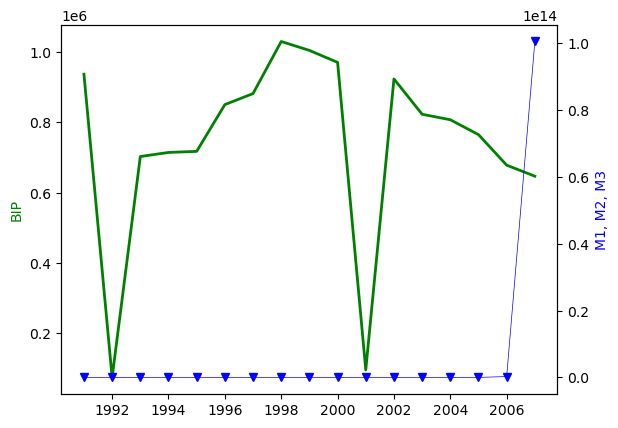

In [49]:
fig, ax1 = plt.subplots()
#unterschiedlicher marker für die verschiedenen Linien
ax2 = ax1.twinx()
ax1.plot(raw['Jahr'], raw['GDP per capita, current prices\r\n (U.S. dollars per capita)'], color='green', linewidth=2, label='BIP' ) 
ax2.plot(raw['Jahr'], raw['Jaehrlich M1 (Z$M)'], color='blue', linewidth=0.5, label='M1', marker = "v")   


ax1.set_ylabel('BIP', color='green')  
ax2.set_ylabel('M1, M2, M3', color='blue')    

In [47]:
raw.columns

Index(['Jahr', 'Jaehrlich M1 (Z$M)', 'Jaehrlich M2 (Z$M)',
       'Jaehrlich M3 (Z$M)',
       'GDP per capita, current prices\r\n (U.S. dollars per capita)',
       'Inflation rate, average consumer prices (Annual percent change)',
       'Unemployment rate'],
      dtype='object')